データサイエンス特論授業課題第3回
作成日: 2022年7月2日
作成者: M1 203324 紺谷優志



In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

In [65]:
def CG(rank:list[int]) -> np.ndarray:
    dcg=np.zeros(len(rank))
    for i in range(len(rank)):
        if i==0:
            dcg[i]=rank[i]
        else:
            dcg[i]=dcg[i-1]+(rank[i])
    return dcg

In [33]:
def DCG(rank:list[int]) -> np.ndarray:
    dcg=np.zeros(len(rank))
    for i in range(len(rank)):
        if i==0:
            dcg[i]=rank[i]
        elif i==1:
            dcg[i]=dcg[i-1]+rank[i]
        else:
            dcg[i]=dcg[i-1]+(rank[i]/np.log2(i+1))
    return dcg

In [38]:
def nDCG(dcg:np.ndarray,idcg:np.ndarray)->np.ndarray:
    ndcg=np.zeros((2,dcg.size))
    for i in range(dcg.size):
        ndcg[0,i]=i
        ndcg[1,i]=dcg[i]/idcg[i]
    return ndcg

In [83]:
# "blue paroot in a cage"
#「カゴの中の青いオウム」なので、オウムの体色に青が少ないものや、オウムがいなかったりカゴの外にいる場合減点対象としている
#rank_google=[3,3,3,3,1,3,1,3,1,3,2,3,3,0,0,0,1,1,0,0]
#rank_bing=  [0,3,3,3,1,0,1,1,2,1,2,0,3,2,3,0,1,3,0,1]

rank_google=[3,3,2,3,3,3,3,3,2,2,0,3,3,1,1,3,0,0,3,0]
rank_bing=[3,3,3,3,3,2,2,3,2,2,3,3,3,2,3,3,3,2,2,2]
#rank_ideal= [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1]
rank_google_ideal=sorted(rank_google,reverse=True)
rank_bing_ideal=sorted(rank_bing,reverse=True)

cg_google=CG(rank_google)
cg_bing=CG(rank_bing)
dcg_google=DCG(rank_google)
dcg_bing=DCG(rank_bing)
#idcg=DCG(rank_ideal)
idcg_google=DCG(rank_google_ideal)
idcg_bing=DCG(rank_bing_ideal)
ndcg_google=nDCG(dcg_google,idcg_google)
ndcg_bing=nDCG(dcg_bing,idcg_bing)

In [84]:
cg_google,cg_bing,dcg_google,dcg_bing,ndcg_google,ndcg_bing

(array([ 3.,  6.,  8., 11., 14., 17., 20., 23., 25., 27., 27., 30., 33.,
        34., 35., 38., 38., 38., 41., 41.]),
 array([ 3.,  6.,  9., 12., 15., 17., 19., 22., 24., 26., 29., 32., 35.,
        37., 40., 43., 46., 48., 50., 52.]),
 array([ 3.        ,  6.        ,  7.26185951,  8.76185951, 10.05388918,
        11.2144476 , 12.28306916, 13.28306916, 13.91399892, 14.51605891,
        14.51605891, 15.35288775, 16.16360221, 16.42625174, 16.68220977,
        17.43220977, 17.43220977, 17.43220977, 18.13843651, 18.13843651]),
 array([ 3.        ,  6.        ,  7.89278926,  9.39278926, 10.68481893,
        11.45852455, 12.17093892, 13.17093892, 13.80186868, 14.40392867,
        15.27112315, 16.10795198, 16.91866645, 17.44396552, 18.21183959,
        18.96183959, 19.69579122, 20.17541615, 20.64623398, 21.1089904 ]),
 array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
          5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
         10.        , 11.   

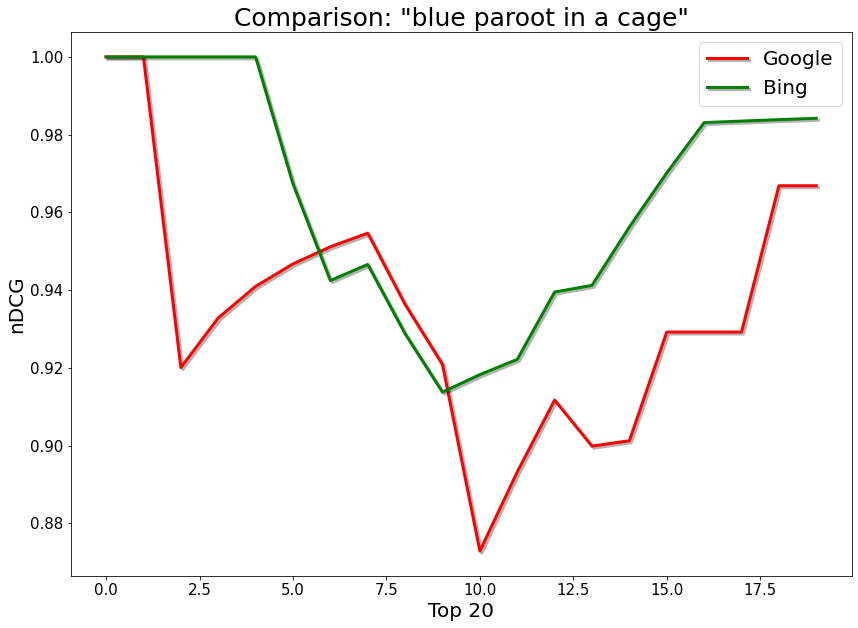

In [85]:
plt.figure(figsize=(14, 10))
plt.plot(ndcg_google[0, :], ndcg_google[1, :], color="red", label="Google", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.plot(ndcg_bing[0, :], ndcg_bing[1, :], color="green", label="Bing", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel("Top 20",fontsize=20)
plt.ylabel("nDCG",fontsize=20)
plt.title("Comparison: \"blue paroot in a cage\"",fontsize=25)
plt.legend(["Google","Bing"],loc="best",fontsize=20)
plt.savefig("kadai3-nDCG-1.pdf")

In [94]:
# "black owl sleeping at night"
#「夜に寝る黒いフクロウ」なので、フクロウの体色に黒が少ない、夜ではない、寝ていない、フクロウではない場合に減点

rank_google=[3,2,3,2,1,2,1,3,3,1,0,2,3,2,1,2,3,1,1,0]
rank_bing=  [1,2,1,2,1,2,2,3,1,1,1,1,2,3,2,1,1,1,1,1]
#rank_ideal= [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1]
rank_google_ideal=sorted(rank_google,reverse=True)
rank_bing_ideal=sorted(rank_bing,reverse=True)

cg_google=CG(rank_google)
cg_bing=CG(rank_bing)
dcg_google=DCG(rank_google)
dcg_bing=DCG(rank_bing)
#idcg=DCG(rank_ideal)
idcg_google=DCG(rank_google_ideal)
idcg_bing=DCG(rank_bing_ideal)
ndcg_google=nDCG(dcg_google,idcg_google)
ndcg_bing=nDCG(dcg_bing,idcg_bing)

In [95]:
cg_google,cg_bing,dcg_google,dcg_bing,ndcg_google,ndcg_bing

(array([ 3.,  5.,  8., 10., 11., 13., 14., 17., 20., 21., 21., 23., 26.,
        28., 29., 31., 34., 35., 36., 36.]),
 array([ 1.,  3.,  4.,  6.,  7.,  9., 11., 14., 15., 16., 17., 18., 20.,
        23., 25., 26., 27., 28., 29., 30.]),
 array([ 3.        ,  5.        ,  6.89278926,  7.89278926,  8.32346582,
         9.09717143,  9.45337862, 10.45337862, 11.39977325, 11.70080325,
        11.70080325, 12.25868914, 13.0694036 , 13.59470267, 13.8506607 ,
        14.3506607 , 15.08461232, 15.32442479, 15.5598337 , 15.5598337 ]),
 array([ 1.        ,  3.        ,  3.63092975,  4.63092975,  5.06160631,
         5.83531193,  6.5477263 ,  7.5477263 ,  7.86319118,  8.16422117,
         8.453286  ,  8.73222894,  9.27270525, 10.06065386, 10.57256991,
        10.82256991, 11.06722045, 11.30703292, 11.54244183, 11.77382004]),
 array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
          5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
         10.        , 11.   

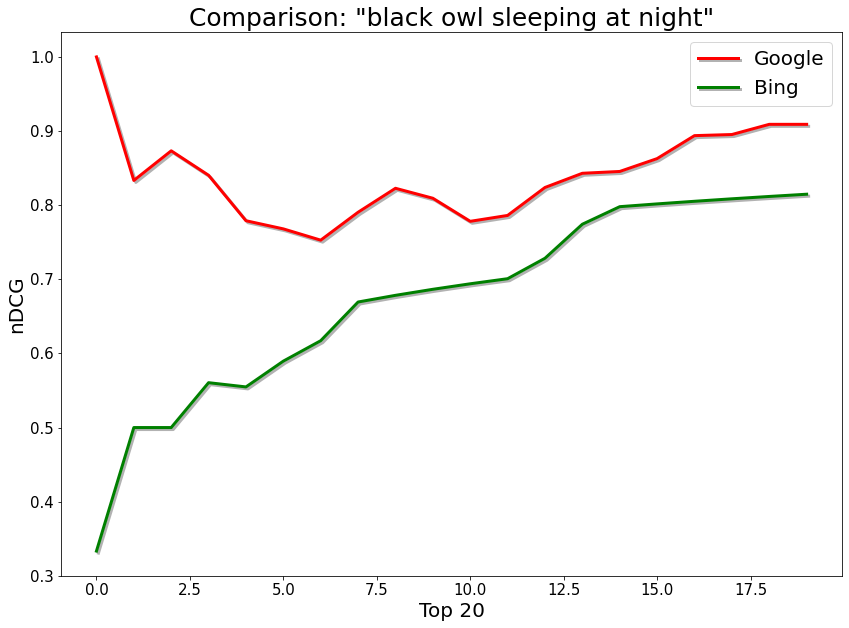

In [97]:
plt.figure(figsize=(14, 10))
plt.plot(ndcg_google[0, :], ndcg_google[1, :], color="red", label="Google", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.plot(ndcg_bing[0, :], ndcg_bing[1, :], color="green", label="Bing", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel("Top 20",fontsize=20)
plt.ylabel("nDCG",fontsize=20)
plt.title("Comparison: \"black owl sleeping at night\"",fontsize=25)
plt.legend(["Google","Bing"],loc="best",fontsize=20)
plt.savefig("kadai3-nDCG-2.pdf")

In [92]:
#課題PDFの例

rank_google=[3,3,3,3,1,3,1,3,1,3,2,3,3,0,0,0,1,1,0,0]
rank_bing=  [0,3,3,3,1,0,1,1,2,1,2,0,3,2,3,0,1,3,0,1]
#rank_ideal= [3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1]
rank_google_ideal=sorted(rank_google,reverse=True)
rank_bing_ideal=sorted(rank_bing,reverse=True)

cg_google=CG(rank_google)
cg_bing=CG(rank_bing)
dcg_google=DCG(rank_google)
dcg_bing=DCG(rank_bing)
#idcg=DCG(rank_ideal)
idcg_google=DCG(rank_google_ideal)
idcg_bing=DCG(rank_bing_ideal)
ndcg_google=nDCG(dcg_google,idcg_google)
ndcg_bing=nDCG(dcg_bing,idcg_bing)

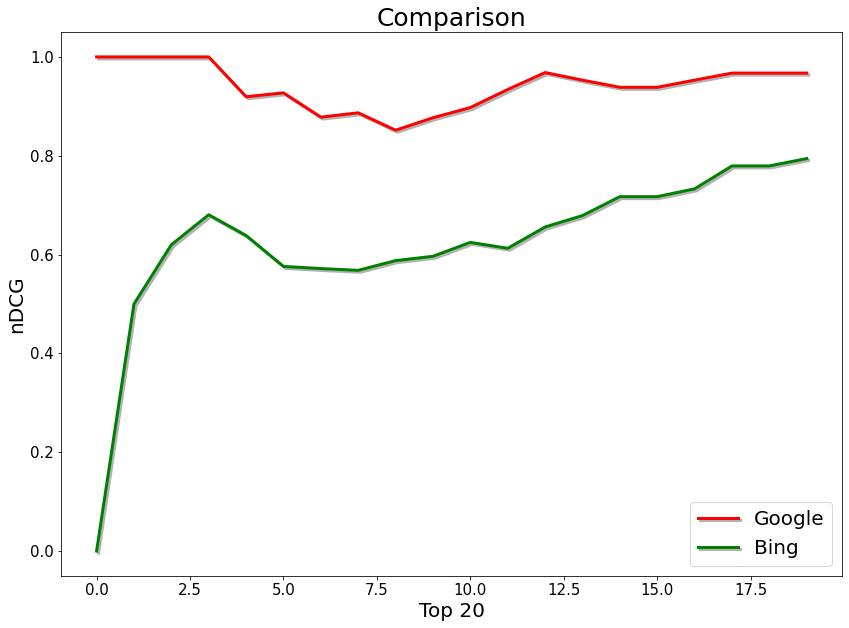

In [93]:
plt.figure(figsize=(14, 10))
plt.plot(ndcg_google[0, :], ndcg_google[1, :], color="red", label="Google", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.plot(ndcg_bing[0, :], ndcg_bing[1, :], color="green", label="Bing", linewidth=3,
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel("Top 20",fontsize=20)
plt.ylabel("nDCG",fontsize=20)
plt.title("Comparison",fontsize=25)
plt.legend(["Google","Bing"],loc="best",fontsize=20)
plt.savefig("example.pdf")